# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
data["plot"] = True

data['pl_move_trail_trigger']   = 0.0030
data['stop_loss_pip']           = 0.0020

data['input_rows'] = 10000

data['sema_len']        = 30
data['slema_len']       = 100
data['lema_len']        = 300
data['llema_len']       = 1000

data['start_date'] = {'year':2021, 'month':1, 'date':1}
data['end_date']   = {'year':2021, 'month':1, 'date':4}

In [3]:
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

pls   -0.00094
dtype: float64

 96%|██████████████████████████████████▍ | 8595/8992 [00:01<00:00, 5809.06it/s]


--------------------------------------
                  date ord_types  llema_angle               close_type  \
3  2021-01-03 23:11:29      long         14.0  simple_slema_move_close   
4  2021-01-03 23:21:23      long         37.0  simple_slema_move_close   
5  2021-01-03 23:32:10      long         14.0  simple_slema_move_close   
6  2021-01-03 23:38:38      long         34.0  simple_slema_move_close   
7  2021-01-03 23:45:40      long         13.0  simple_slema_move_close   
8  2021-01-03 23:47:49      long         15.0               sema_close   
9  2021-01-03 23:50:26     short         -6.0  simple_slema_move_close   
10 2021-01-04 00:04:25     short        -37.0  simple_slema_move_close   
11 2021-01-04 00:08:32     short        -20.0  simple_slema_move_close   
12 2021-01-04 00:19:03      long         15.0               sema_close   
13 2021-01-04 00:22:02     short        -18.0  simple_slema_move_close   
14 2021-01-04 00:29:59     short        -23.0               sema_close  

100%|████████████████████████████████████| 8992/8992 [00:01<00:00, 7105.63it/s]


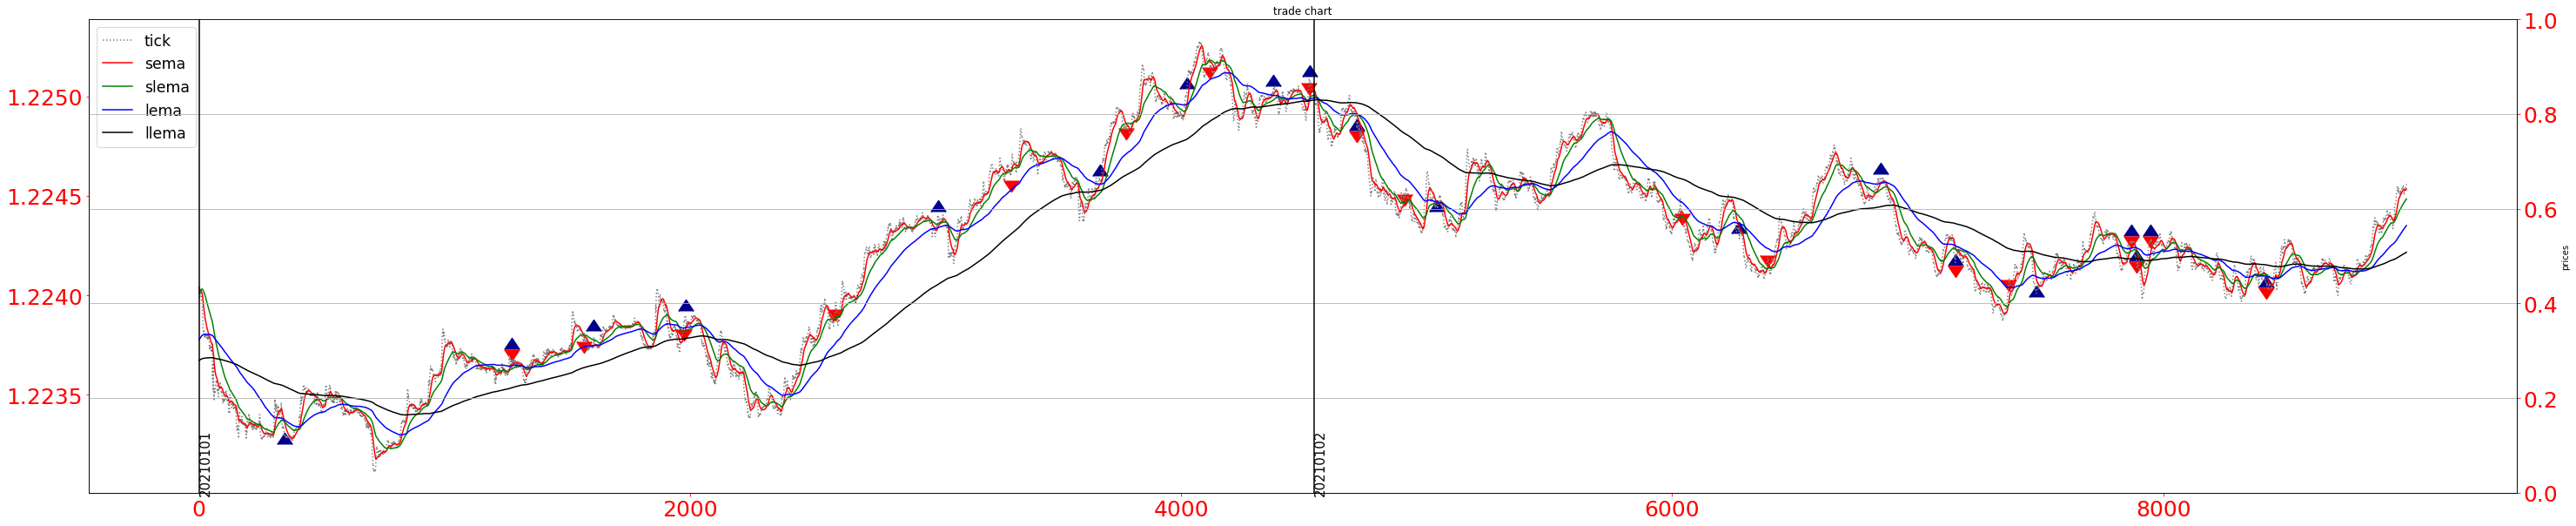

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104']
Total PL : -0.0009399999999999999
-------------
net_pl            : -0.00094/0.00314
-------------
+ve               : num= 11    sum= +0.0011    avg= +0.0001
-ve               : num= 7    sum= -0.00204    avg= -0.00029
-----------------------------------------------------
date_val
3    0.00016
4   -0.00110
Name: pls, dtype: float64
-----------------------------------------------------
 0.00001    3
 0.00011    2
-0.00013    2
 0.00032    1
-0.00031    1
 0.00007    1
-0.00046    1
 0.00024    1
 0.00002    1
 0.00004    1
-0.00027    1
 0.00016    1
-0.00026    1
-0.00048    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [5]:
data['df']

,DateTime,Bid,Ask,Volume,i,tick,sema,lema,slema,llema,llema_angle
0,20210103 23:00:16.791,1.22399,1.22410,1,0,1.224045,1.224039,1.223777,1.224014,1.223673,34.875328
1,20210103 23:00:17.153,1.22394,1.22411,1,0,1.224025,1.224037,1.223779,1.224016,1.223674,36.027373
2,20210103 23:00:17.204,1.22392,1.22405,1,0,1.223985,1.224033,1.223781,1.224017,1.223674,33.929797
3,20210103 23:00:17.305,1.22393,1.22405,1,0,1.223990,1.224029,1.223782,1.224019,1.223675,33.206570
4,20210103 23:00:17.407,1.22393,1.22411,1,0,1.224020,1.224028,1.223784,1.224021,1.223676,33.929797
...,...,...,...,...,...,...,...,...,...,...,...
8987,20210104 01:07:09.505,1.22450,1.22456,5,0,1.224530,1.224528,1.224344,1.224476,1.224214,36.027373
8988,20210104 01:07:09.862,1.22451,1.22457,2,0,1.224540,1.224529,1.224345,1.224478,1.224214,34.875328
8989,20210104 01:07:09.964,1.22452,1.22457,3,0,1.224545,1.224530,1.224347,1.224480,1.224215,35.108380
8990,20210104 01:07:10.066,1.22452,1.22458,3,0,1.224550,1.224532,1.224349,1.224482,1.224216,36.702855
